In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,BisectingKMeans,Birch
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score

In [2]:
input_file = "rationalized_data.xlsx"
df = pd.read_excel(input_file)

In [3]:
df.system.unique()
df_sorted = df.sort_values(by=['LastDate', 'region', 'system'])
df.LastDate.unique()

output_file_sorted = 'sorted_rationalized_data.xlsx'
df_sorted.to_excel(output_file_sorted, index=False)

<Figure size 1200x800 with 0 Axes>

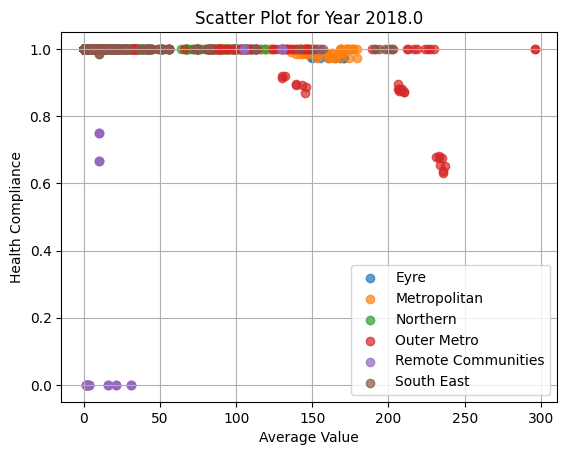

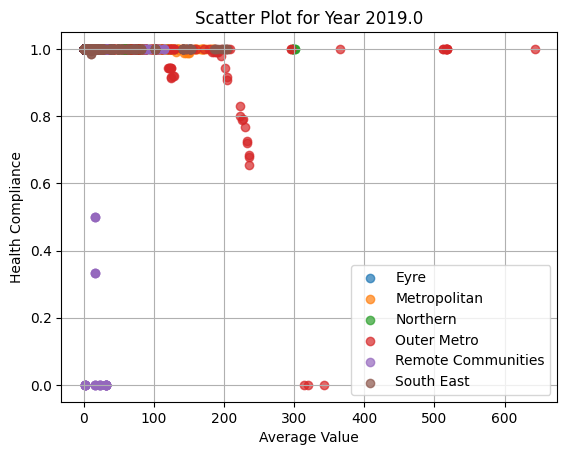

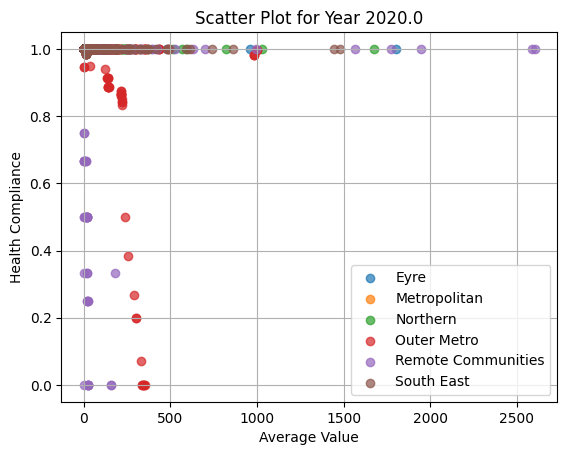

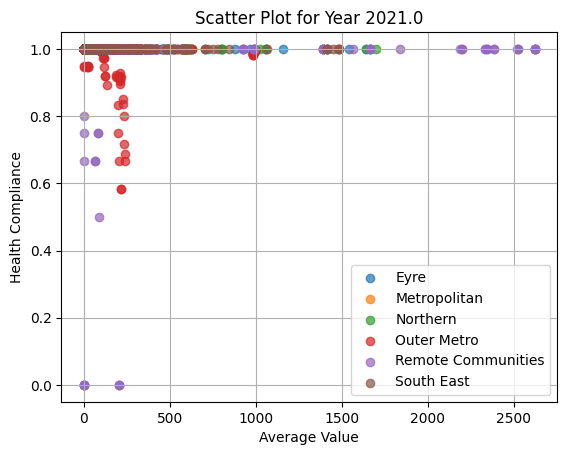

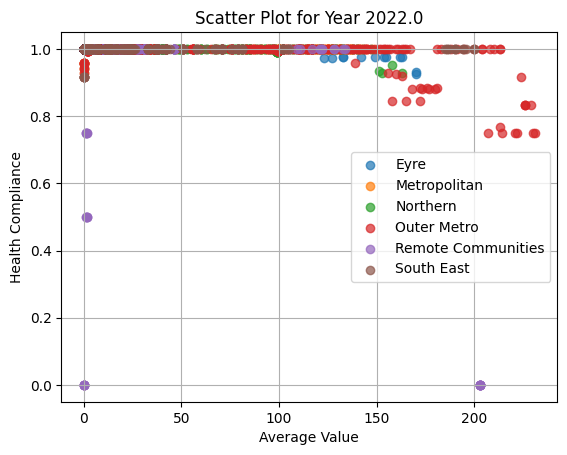

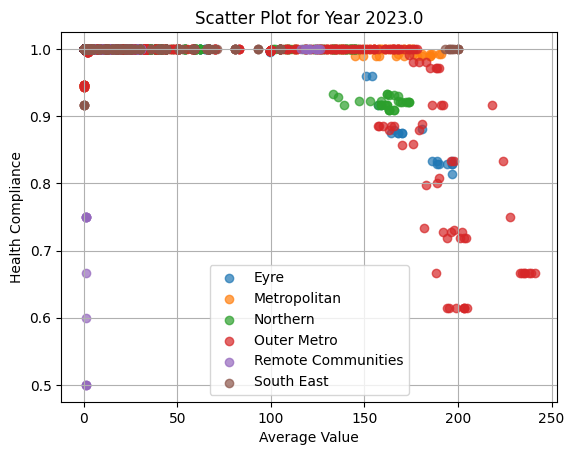

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


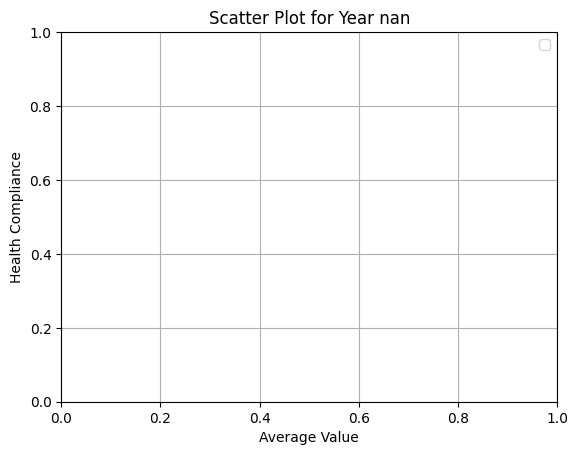

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df_sorted with the necessary data

# Extracting year from LastDate
df_sorted['Year'] = df_sorted['LastDate'].dt.year

# Grouping by region and year
grouped = df_sorted.groupby(['region', 'Year'])

# Create separate scatter plots for each year
years = df_sorted['Year'].unique()

plt.figure(figsize=(12, 8))

for year in years:
    plt.figure()
    plt.title(f'Scatter Plot for Year {year}')
    plt.xlabel('Average Value')
    plt.ylabel('Health Compliance')
    
    for name, group in grouped:
        if year in group['Year'].values:
            year_data = group[group['Year'] == year]
            plt.scatter(
                year_data['average_value'],
                year_data['health_compliance'],
                label=name[0],  # Region name
                alpha=0.7
            )
    
    plt.legend()
    plt.grid(True)
    plt.show()


In [14]:

# Sorting the DataFrame by year and average_value
sorted_df = df_sorted.sort_values(['Year', 'average_value'], ascending=[True, False])

# Grouping by year and displaying the top three parameters for each year
top_three_per_year = sorted_df.groupby('Year').head(3)[['Year', 'parameter', 'average_value']]

print("Top three parameters with the highest average value for each year:")
print(top_three_per_year)

Top three parameters with the highest average value for each year:
          Year                 parameter  average_value
2811    2018.0                 Manganese          296.0
3403    2018.0                 Manganese          296.0
2799    2018.0           Trihalomethanes          237.0
8314    2019.0                 Manganese          643.0
7707    2019.0                 Manganese          518.0
8283    2019.0                 Manganese          518.0
16775   2020.0  Nitrate + nitrite as NO3         2603.0
16750   2020.0  Nitrate + nitrite as NO3         2585.0
16768   2020.0  Nitrate + nitrite as NO3         1946.0
24565   2021.0  Nitrate + nitrite as NO3         2623.0
29753   2021.0  Nitrate + nitrite as NO3         2623.0
32351   2021.0  Nitrate + nitrite as NO3         2623.0
68335   2022.0    Trihalomethanes (THMs)          231.0
70939   2022.0    Trihalomethanes (THMs)          230.0
60628   2022.0    Trihalomethanes (THMs)          229.0
108958  2023.0    Trihalomethanes (TH

<Figure size 1200x800 with 0 Axes>

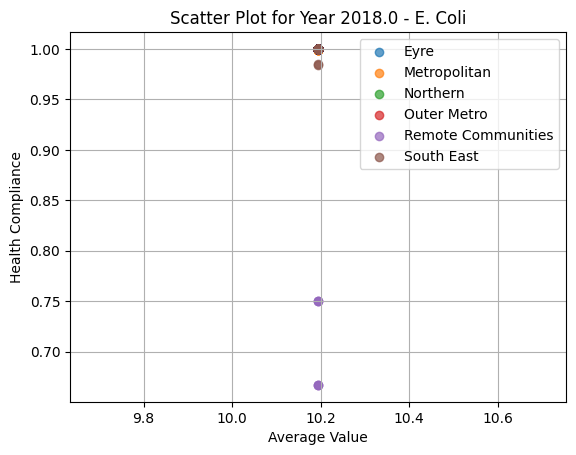

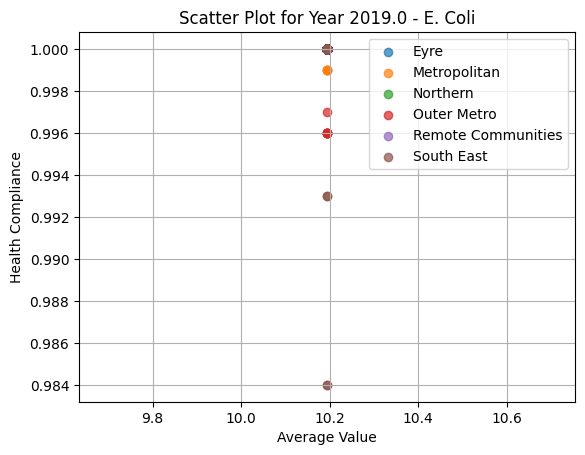

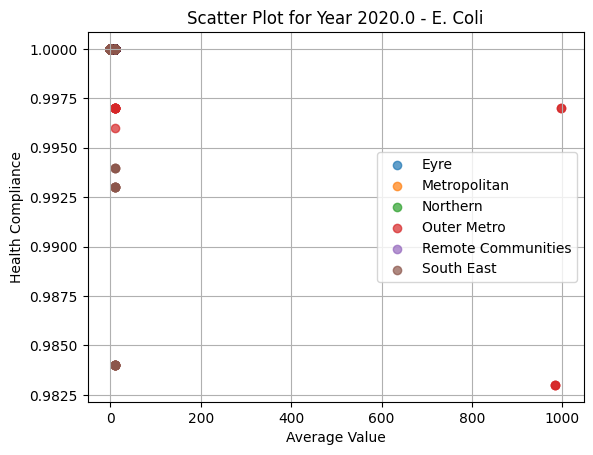

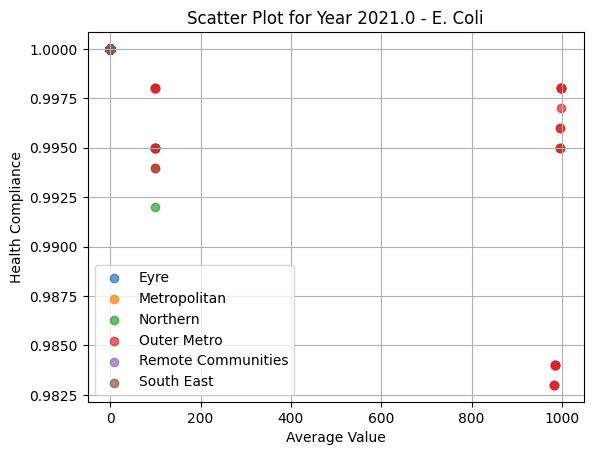

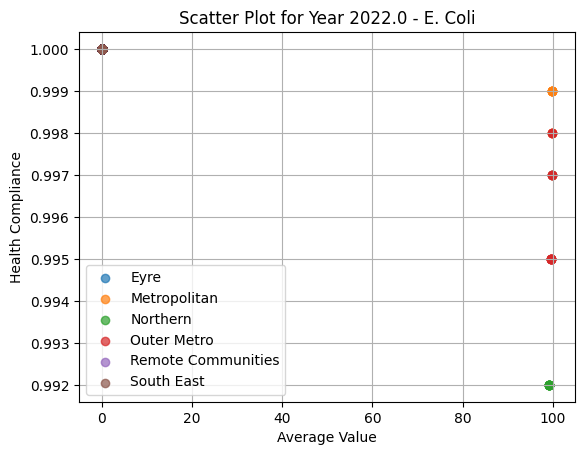

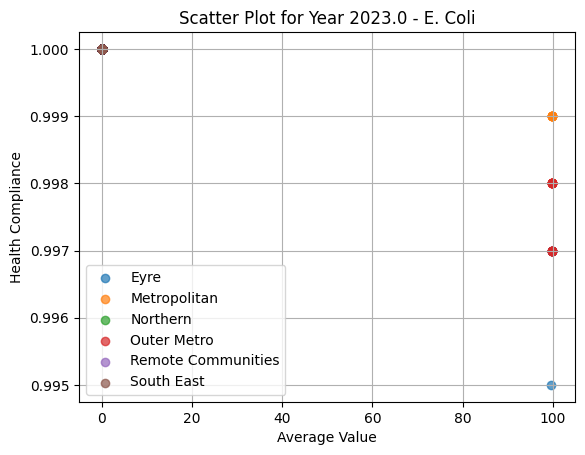

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


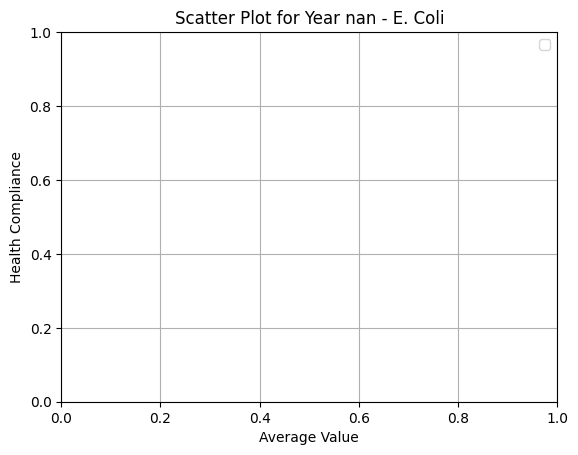

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df_sorted with the necessary data

# Extracting year from LastDate
df_sorted['Year'] = df_sorted['LastDate'].dt.year

# Filter data for E. Coli
ecoli_data = df_sorted[df_sorted['parameter'] == 'E. coli']

# Grouping by region and year
grouped = ecoli_data.groupby(['region', 'Year'])

# Create separate scatter plots for each year
years = ecoli_data['Year'].unique()

plt.figure(figsize=(12, 8))

for year in years:
    plt.figure()
    plt.title(f'Scatter Plot for Year {year} - E. Coli')
    plt.xlabel('Average Value')
    plt.ylabel('Health Compliance')
    
    for name, group in grouped:
        if year in group['Year'].values:
            year_data = group[group['Year'] == year]
            plt.scatter(
                year_data['average_value'],
                year_data['health_compliance'],
                label=name[0],  # Region name
                alpha=0.7
            )
    
    plt.legend()
    plt.grid(True)
    plt.show()


In [25]:
import pandas as pd

# Assuming you have a DataFrame named df_sorted with the necessary data

# Extracting year from LastDate
df_sorted['Year'] = df_sorted['LastDate'].dt.year

# Filter data for E. Coli
ecoli_data = df_sorted[df_sorted['parameter'] == 'E. coli']

# Grouping by region and year
grouped = ecoli_data.groupby(['region', 'Year'])

# Display tables for each year
years = ecoli_data['Year'].unique()

for year in years:
    print(f"E. Coli Data for Year {year}\n")
    for name, group in grouped:
        if year in group['Year'].values:
            year_data = group[group['Year'] == year]
            print(f"Region: {name[0]}")
            print(year_data[['average_value', 'health_compliance']])
            print("\n")


E. Coli Data for Year 2018.0

Region: Eyre
      average_value  health_compliance
1         10.194227                1.0
6         10.194227                1.0
11        10.194227                1.0
16        10.194227                1.0
21        10.194227                1.0
394       10.194227                1.0
399       10.194227                1.0
404       10.194227                1.0
409       10.194227                1.0
414       10.194227                1.0
790       10.194227                1.0
795       10.194227                1.0
800       10.194227                1.0
805       10.194227                1.0
810       10.194227                1.0
1184      10.194227                1.0
1189      10.194227                1.0
1194      10.194227                1.0
1199      10.194227                1.0
1204      10.194227                1.0
1569      10.194227                1.0
1574      10.194227                1.0
1578      10.194227                1.0
1583      10.194227  

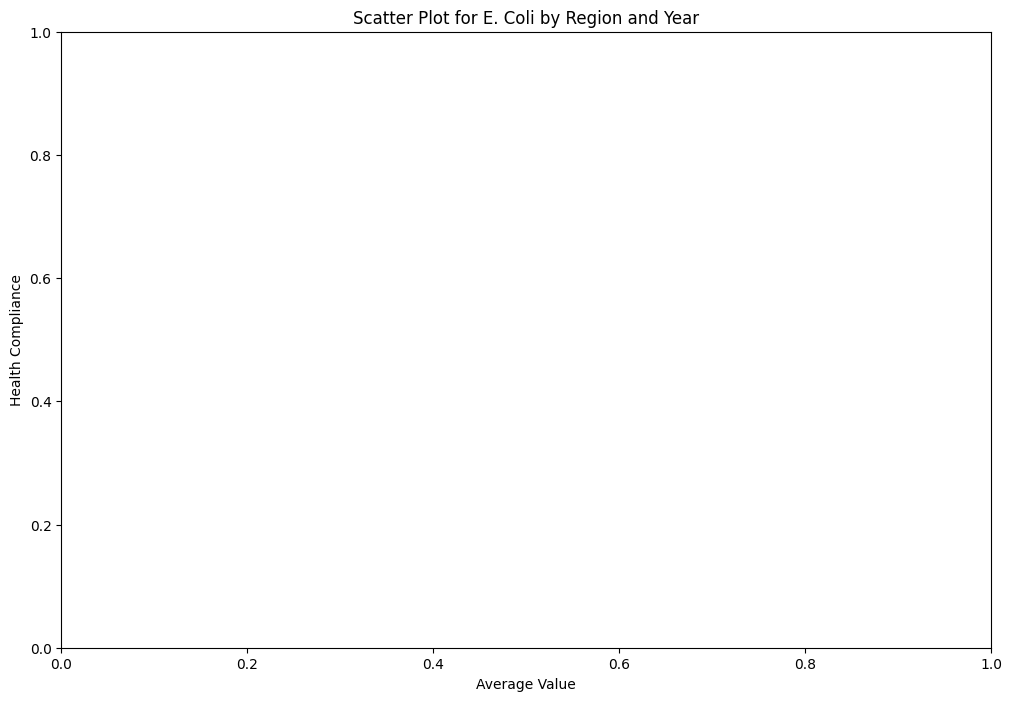

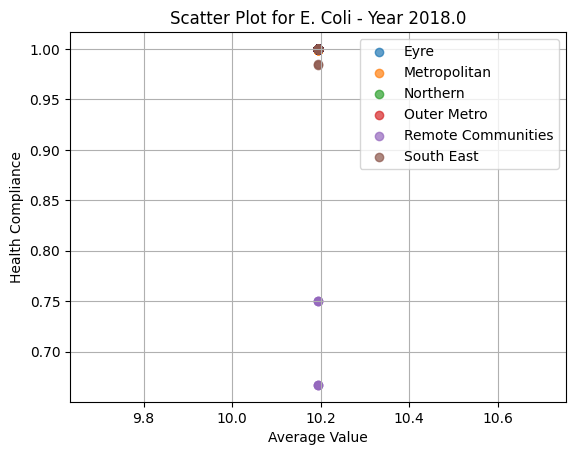

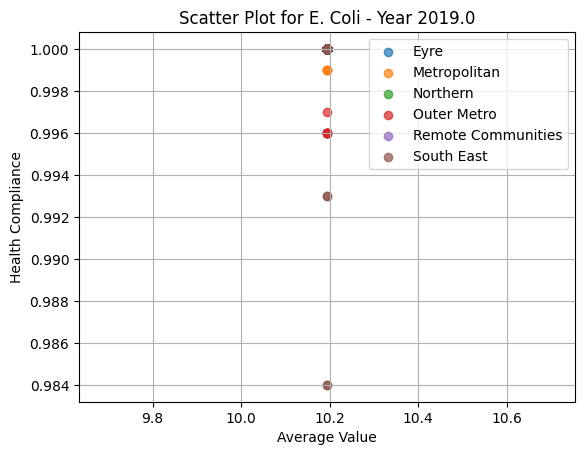

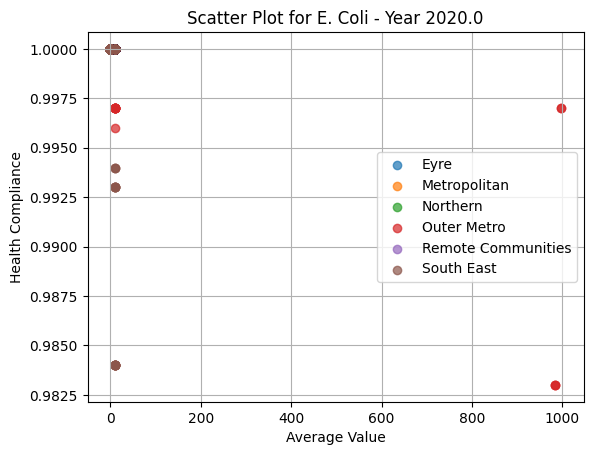

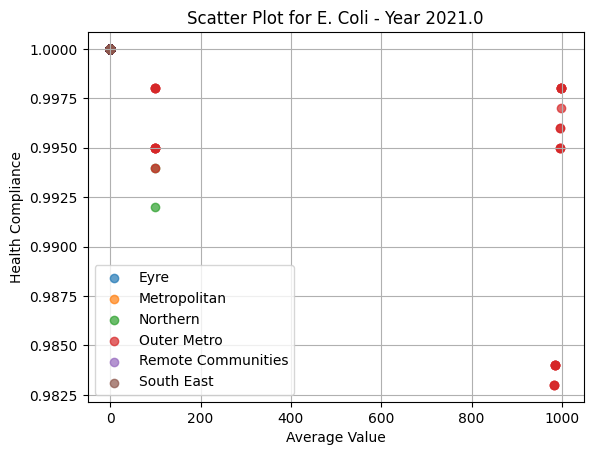

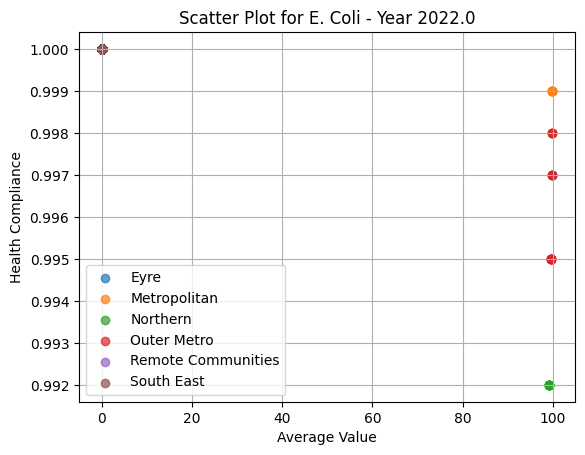

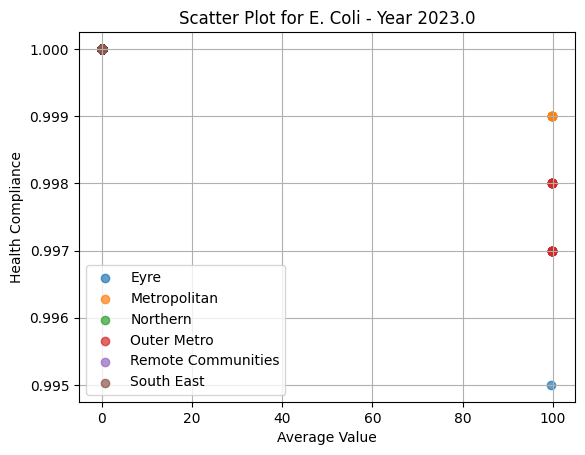

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


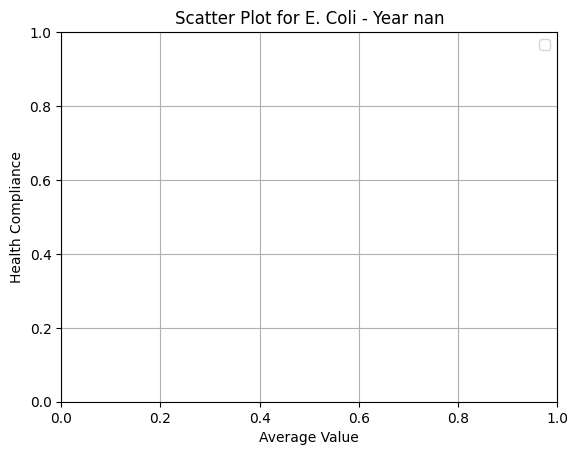

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df_sorted with the necessary data

# Extracting year from LastDate
df_sorted['Year'] = df_sorted['LastDate'].dt.year

# Filter data for E. Coli
ecoli_data = df_sorted[df_sorted['parameter'] == 'E. coli']

# Grouping by region and year
grouped = ecoli_data.groupby(['region', 'Year'])

# Create separate scatter plots for each year
plt.figure(figsize=(12, 8))
plt.title('Scatter Plot for E. Coli by Region and Year')
plt.xlabel('Average Value')
plt.ylabel('Health Compliance')

years = ecoli_data['Year'].unique()

for year in years:
    plt.figure()
    plt.title(f'Scatter Plot for E. Coli - Year {year}')
    plt.xlabel('Average Value')
    plt.ylabel('Health Compliance')

    for name, group in grouped:
        region_data = group[group['Year'] == year]
        if not region_data.empty:
            plt.scatter(
                region_data['average_value'],
                region_data['health_compliance'],
                label=name[0],
                alpha=0.7
            )
    
    plt.legend()
    plt.grid(True)
    plt.show()


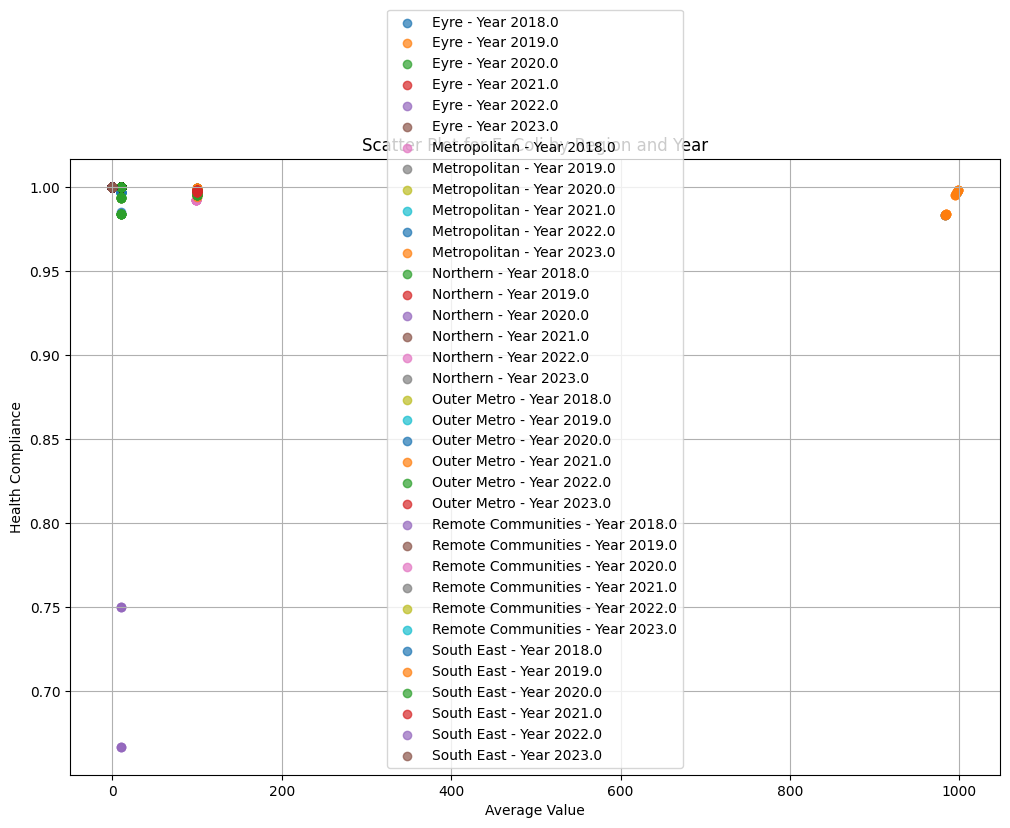

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df_sorted with the necessary data

# Extracting year from LastDate
df_sorted['Year'] = df_sorted['LastDate'].dt.year

# Filter data for E. Coli
ecoli_data = df_sorted[df_sorted['parameter'] == 'E. coli']

# Grouping by region and year
grouped = ecoli_data.groupby(['region', 'Year'])

# Create scatter plot for E. Coli for each region
plt.figure(figsize=(12, 8))
plt.title('Scatter Plot for E. Coli by Region and Year')
plt.xlabel('Average Value')
plt.ylabel('Health Compliance')

years = ecoli_data['Year'].unique()

for name, group in grouped:
    region_data = group
    plt.scatter(
        region_data['average_value'],
        region_data['health_compliance'],
        label=f"{name[0]} - Year {name[1]}",
        alpha=0.7
    )

plt.legend()
plt.grid(True)
plt.show()


In [44]:
import pandas as pd

# Assuming you have a DataFrame named df_sorted with the necessary data

# Filter for parameters having numeric health guideline values
numeric_guidelines = df_sorted[pd.to_numeric(df_sorted['health_guideline'], errors='coerce').notnull()]

# Convert relevant columns to numeric
numeric_guidelines['health_guideline'] = pd.to_numeric(numeric_guidelines['health_guideline'])
numeric_guidelines['average_value'] = pd.to_numeric(numeric_guidelines['average_value'])
numeric_guidelines['health_compliance'] = pd.to_numeric(numeric_guidelines['health_compliance'])

# Calculate adherence to health guideline
numeric_guidelines['guideline_adherence'] = numeric_guidelines['average_value'] / numeric_guidelines['health_guideline']

# Filter for parameters strictly adhering to health guidelines
strictly_compliant = numeric_guidelines[numeric_guidelines['guideline_adherence'] <= 1]

# Group by parameter and calculate average of average_value and health_guideline
param_avg_values = strictly_compliant.groupby('parameter').agg({
    'average_value': 'mean',
    'health_guideline': 'mean'
}).reset_index()

# Sort parameters by the average of average_value
sorted_params = param_avg_values.sort_values(by='average_value')

# Add a rank column
sorted_params['Rank'] = range(1, len(sorted_params) + 1)

# Display the ranked parameters with mean values
sorted_params = sorted_params[['Rank', 'parameter', 'average_value', 'health_guideline']]
print(sorted_params)


   Rank                parameter  average_value  health_guideline
1     1                     Lead       0.000100              0.01
2     2             Lead - Total       0.000100              0.01
3     3                Manganese       0.000718              0.50
6     4  Residual Monochloramine       0.321182              5.00
0     5                 Fluoride       0.372606              1.50
5     6   Residual Free Chlorine       1.617261              5.00
7     7  Residual Total Chlorine       3.044355              5.00
4     8                     NDMA       8.107143            100.00
8     9          Trihalomethanes      67.847902            250.00


/tmp/ipykernel_210929/1845714200.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_guidelines['health_guideline'] = pd.to_numeric(numeric_guidelines['health_guideline'])
/tmp/ipykernel_210929/1845714200.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_guidelines['average_value'] = pd.to_numeric(numeric_guidelines['average_value'])
/tmp/ipykernel_210929/1845714200.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

/home/umarhasan/SchoolWorks/KK-WaterAnalysis/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


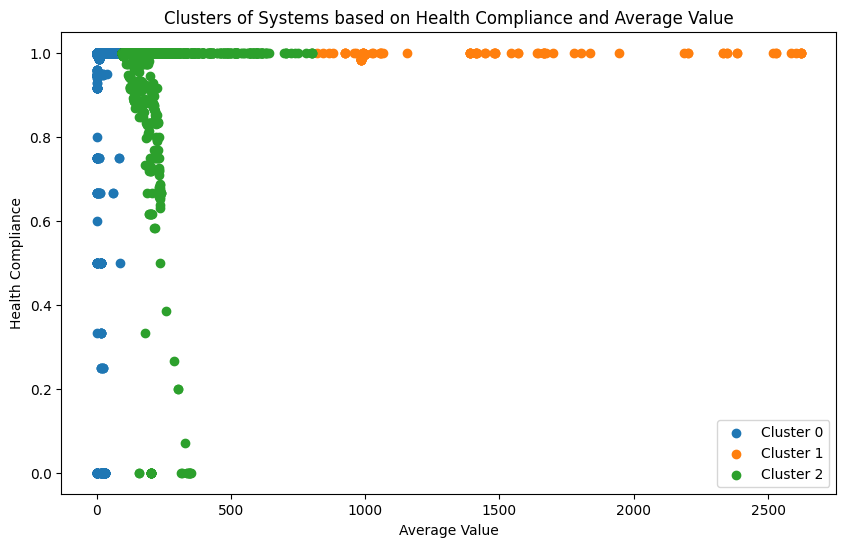

Systems in Cluster 0:
            system  health_compliance  average_value
0       Coffin Bay                1.0       1.000000
1       Coffin Bay                1.0      10.194227
2       Coffin Bay                1.0       1.300000
3       Coffin Bay                1.0       0.001000
4       Coffin Bay                1.0      10.000000
...            ...                ...            ...
111646   Tarpeena                 1.0       2.000000
111647   Tarpeena                 1.0       7.000000
111648   Tarpeena                 1.0      21.000000
111649   Tarpeena                 1.0       8.000000
111650   Tarpeena                 1.0      55.000000

[109058 rows x 3 columns]
Systems in Cluster 1:
                                                  system  health_compliance  \
15138                                         Eyre South              1.000   
15172                                 Eyre South/Morgan               1.000   
15721                                            Melrose

In [48]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df_sorted with the necessary data

# Convert columns to numeric
df_sorted['health_compliance'] = pd.to_numeric(df_sorted['health_compliance'], errors='coerce')
df_sorted['average_value'] = pd.to_numeric(df_sorted['average_value'], errors='coerce')

# Drop rows with NaN values in 'health_compliance' and 'average_value'
df_sorted.dropna(subset=['health_compliance', 'average_value'], inplace=True)

# Selecting features for clustering
X = df_sorted[['health_compliance', 'average_value']].values

# Choosing the number of clusters (adjust as needed)
num_clusters = 3

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters)
df_sorted['cluster'] = kmeans.fit_predict(X)

# Plotting clusters
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    cluster_data = df_sorted[df_sorted['cluster'] == i]
    plt.scatter(cluster_data['average_value'], cluster_data['health_compliance'], label=f'Cluster {i}')

plt.xlabel('Average Value')
plt.ylabel('Health Compliance')
plt.title(f'Clusters of Systems based on Health Compliance and Average Value')
plt.legend()
plt.show()

# Displaying the systems in each cluster
for i in range(num_clusters):
    cluster_data = df_sorted[df_sorted['cluster'] == i]
    print(f"Systems in Cluster {i}:")
    print(cluster_data[['system', 'health_compliance', 'average_value']])


/home/umarhasan/SchoolWorks/KK-WaterAnalysis/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/umarhasan/SchoolWorks/KK-WaterAnalysis/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/umarhasan/SchoolWorks/KK-WaterAnalysis/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/umarhasan/SchoolWorks/KK-WaterAnalysis/.venv/lib/python3.1

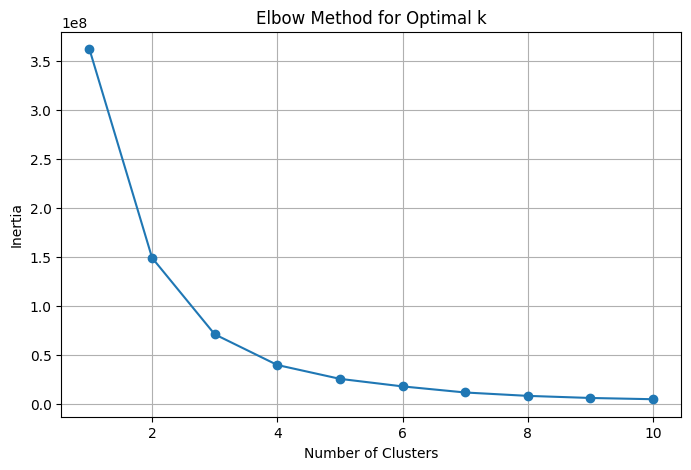

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have a DataFrame named df_sorted with the necessary data

# Convert columns to numeric
df_sorted['health_compliance'] = pd.to_numeric(df_sorted['health_compliance'], errors='coerce')
df_sorted['average_value'] = pd.to_numeric(df_sorted['average_value'], errors='coerce')

# Drop rows with NaN values in 'health_compliance' and 'average_value'
df_sorted.dropna(subset=['health_compliance', 'average_value'], inplace=True)

# Selecting features for clustering
X = df_sorted[['health_compliance', 'average_value']].values

# Calculate inertia for different number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()
